<center><h1>ML Lab: PCA and KPCA</h1></center>
<center><h3>Arush Sharma 16BCE1127</h3></center>

<p>For this lab, I will be using Absenteeism at work dataset which is available at UCI Machine Learning, I will be applying classifaction before apply PCA and KPCA and compare the performance after applying PCA and KPCA.</p>

In [2]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

#df.tail()

In [3]:
# split data table into data X and class labels y

X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [4]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

<h3>PCA in scikit-learn</h3>

<p>We will now be applying PCA using scikit-learn inbuilt function</p>

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

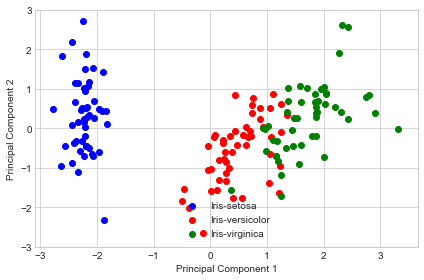

In [8]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

<h4>Loading the dataset</h4>

In [13]:
absent_data=pd.read_csv("Absenteeism_at_work.csv", sep = ';')

In [14]:
from sklearn.preprocessing import StandardScaler
standard_X = StandardScaler()

In [15]:
X_not_std = absent_data.iloc[ : , :].values
X_std = standard_X.fit_transform(X_not_std)

In [16]:
absent_data_std_full = pd.DataFrame(data=X_std[:,:], columns=absent_data.columns[:].values)
absent_data_std_full.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,-0.637161,0.804938,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,...,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,0.851673,-0.019046,0.775932,-0.219511
1,1.632719,-2.280124,0.196763,-0.643947,-1.390175,-1.544379,-1.121694,1.242825,2.092860,-0.818212,...,4.183300,-0.433857,-0.017234,0.872872,-0.280566,-0.566240,1.473056,0.975828,1.009438,-0.519767
2,-1.363523,0.448970,0.196763,0.059924,-1.390175,-0.632665,1.441240,1.242825,0.239405,-0.818212,...,-0.239046,-0.433857,-0.928191,0.872872,-0.280566,-0.566240,0.774000,-0.350671,1.009438,-0.369639
3,-1.000342,-1.449530,0.196763,0.763796,-1.390175,0.861947,-1.661258,0.329981,0.393859,-0.818212,...,-0.239046,-0.433857,0.893723,0.872872,3.564226,-0.566240,-0.857131,-0.682295,-0.625100,-0.219511
4,-0.637161,0.448970,0.196763,0.763796,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,...,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,0.851673,-0.019046,0.775932,-0.369639
5,-1.363523,0.448970,0.196763,1.467667,-1.390175,-0.632665,1.441240,1.242825,0.239405,-0.818212,...,-0.239046,-0.433857,-0.928191,0.872872,-0.280566,-0.566240,0.774000,-0.350671,1.009438,-0.369639
6,-0.727957,0.330313,0.196763,1.467667,-1.390175,2.087529,1.508686,-2.180340,-1.305142,-0.818212,...,-0.239046,-0.433857,-0.017234,0.872872,-0.280566,2.470119,0.074944,-0.019046,0.075416,0.080744
7,0.179995,0.448970,0.196763,1.467667,-1.390175,0.577971,1.373794,-0.354652,-0.069505,-0.818212,...,-0.239046,-0.433857,2.715637,0.872872,-0.280566,-0.566240,-1.090150,-0.682295,-0.858606,-0.219511
8,-0.364776,-0.025655,0.196763,-1.347819,-1.390175,-0.991372,-1.189139,0.329981,-0.378414,-0.818212,...,-0.239046,-0.433857,0.893723,0.872872,-0.280566,-0.566240,1.240037,3.960449,-0.391595,2.482788
9,-1.545113,0.330313,0.196763,-1.347819,-1.390175,0.204318,-1.256585,0.329981,0.084950,-0.818212,...,-0.239046,2.538869,-0.017234,-1.145644,-0.280566,0.192850,0.696327,-0.019046,0.542427,0.080744


In [17]:
pet_filtered = absent_data_std_full.drop(columns = ['Pet'])
pet_filtered

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Weight,Height,Body mass index,Absenteeism time in hours
0,-0.637161,0.804938,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.851673,-0.019046,0.775932,-0.219511
1,1.632719,-2.280124,0.196763,-0.643947,-1.390175,-1.544379,-1.121694,1.242825,2.092860,-0.818212,0.638686,4.183300,-0.433857,-0.017234,0.872872,-0.280566,1.473056,0.975828,1.009438,-0.519767
2,-1.363523,0.448970,0.196763,0.059924,-1.390175,-0.632665,1.441240,1.242825,0.239405,-0.818212,0.638686,-0.239046,-0.433857,-0.928191,0.872872,-0.280566,0.774000,-0.350671,1.009438,-0.369639
3,-1.000342,-1.449530,0.196763,0.763796,-1.390175,0.861947,-1.661258,0.329981,0.393859,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,3.564226,-0.857131,-0.682295,-0.625100,-0.219511
4,-0.637161,0.448970,0.196763,0.763796,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.851673,-0.019046,0.775932,-0.369639
5,-1.363523,0.448970,0.196763,1.467667,-1.390175,-0.632665,1.441240,1.242825,0.239405,-0.818212,0.638686,-0.239046,-0.433857,-0.928191,0.872872,-0.280566,0.774000,-0.350671,1.009438,-0.369639
6,-0.727957,0.330313,0.196763,1.467667,-1.390175,2.087529,1.508686,-2.180340,-1.305142,-0.818212,0.638686,-0.239046,-0.433857,-0.017234,0.872872,-0.280566,0.074944,-0.019046,0.075416,0.080744
7,0.179995,0.448970,0.196763,1.467667,-1.390175,0.577971,1.373794,-0.354652,-0.069505,-0.818212,0.638686,-0.239046,-0.433857,2.715637,0.872872,-0.280566,-1.090150,-0.682295,-0.858606,-0.219511
8,-0.364776,-0.025655,0.196763,-1.347819,-1.390175,-0.991372,-1.189139,0.329981,-0.378414,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,-0.280566,1.240037,3.960449,-0.391595,2.482788
9,-1.545113,0.330313,0.196763,-1.347819,-1.390175,0.204318,-1.256585,0.329981,0.084950,-0.818212,0.638686,-0.239046,2.538869,-0.017234,-1.145644,-0.280566,0.696327,-0.019046,0.542427,0.080744


In [37]:
X = pet_filtered.values[:]

In [38]:
X

array([[-0.63716146,  0.80493838,  0.19676258, ..., -0.01904601,
         0.77593223, -0.21951111],
       [ 1.63271857, -2.28012426,  0.19676258, ...,  0.97582783,
         1.00943766, -0.51976661],
       [-1.36352307,  0.44896961,  0.19676258, ..., -0.35067062,
         1.00943766, -0.36963886],
       ...,
       [-1.27272787, -2.28012426, -1.84169773, ..., -0.35067062,
         1.70995395, -0.51976661],
       [-0.90954706, -2.28012426, -1.84169773, ..., -0.35067062,
         1.94345938, -0.51976661],
       [ 1.54192337, -2.28012426, -1.84169773, ...,  0.47839091,
        -0.39159492, -0.51976661]])

In [39]:
pet_label = absent_data.iloc[:, 16].values
y = pet_label

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### Implementation 1: Using MLP classifier`

In [69]:
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")
mlp = MLPClassifier(max_iter =50)
mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))

[[136   4   3   0   0   0]
 [  6  31   0   0   0   0]
 [  4   1  28   0   0   0]
 [  0   0   0   5   0   0]
 [  0   1   0   0   0   0]
 [  3   0   0   0   0   0]]


#### We get a decent performance from MLP. We try and see if we can obtain a better / similar performance after reducing the dimensions of the dataset.

In [70]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)

In [71]:
print(pca.explained_variance_ratio_)

[0.16771293 0.11530391 0.10129517 0.07696482 0.07116741 0.06732992
 0.05500802 0.0514928  0.05008089 0.04780287 0.04138726 0.03686796
 0.0306564  0.0213942  0.01823968]


In [72]:
print(pca.singular_values_)

[42.09577791 34.90416813 32.71520368 28.51683987 27.42179205 26.67222946
 24.1083925  23.32536775 23.00336163 22.47409778 20.91166546 19.73694038
 17.99765304 15.03499572 13.8823768 ]


In [73]:
mlp2 = MLPClassifier(max_iter = 50)
mlp2.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=50, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [74]:
predictions = mlp2.predict(X_test)

In [75]:
print(confusion_matrix(y_test, predictions))

[[133   7   3   0   0   0]
 [  1  36   0   0   0   0]
 [  2   2  29   0   0   0]
 [  0   0   0   5   0   0]
 [  0   0   0   0   1   0]
 [  3   0   0   0   0   0]]


#### The classification performance here, is similar in PCA to that of normal MLPClassifier.

### Implementation 2: KPCA before MLP

In [76]:
from sklearn.decomposition import KernelPCA

In [77]:
transformer = KernelPCA()

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
X_train_trans = transformer.fit_transform(X_train)
X_test_trans = transformer.transform(X_test)

In [79]:
mlp3 = MLPClassifier(max_iter = 50)
mlp3.fit(X_train_trans, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=50, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [80]:
predictions = mlp3.predict(X_test_trans)
print(confusion_matrix(y_test, predictions))

[[137   3   3   0   0   0]
 [  1  36   0   0   0   0]
 [  5   0  28   0   0   0]
 [  0   0   0   5   0   0]
 [  0   0   0   0   1   0]
 [  3   0   0   0   0   0]]


#### There is a major improvement in the classification of 6th class, which was not done so far by the other classes. Thus KPCA has shown promise in classification improvement.